Accuratezza del modello: 0.82
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2649
           1       0.61      0.42      0.50       721

    accuracy                           0.82      3370
   macro avg       0.73      0.67      0.69      3370
weighted avg       0.80      0.82      0.81      3370



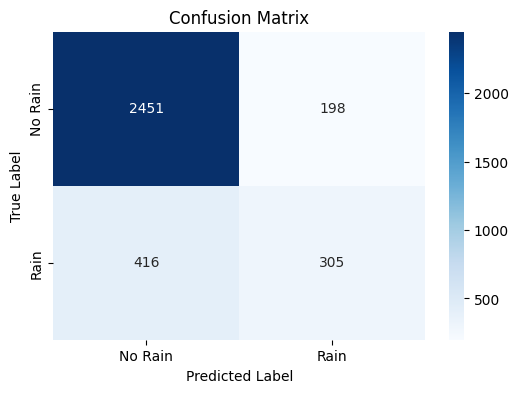

In [2]:
import pandas as pd

# URL del dataset (sostituiscilo con il tuo link)
url = "https://raw.githubusercontent.com/boradpreet/Weather_dataset/refs/heads/master/Weather%20Test%20Data.csv"

# Carica il dataset
df = pd.read_csv(url)


# 1. Rimozione dei valori mancanti
df = df.dropna()

# 2. Conversione della colonna 'Rain' in valori numerici
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Selezione delle caratteristiche e della variabile target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']
X = df[features]
y = df['RainToday']


from sklearn.model_selection import train_test_split

# Suddivisione dei dati (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Creazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Predizioni sul set di test
y_pred = model.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.2f}")

# Report di classificazione
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# Creiamo una heatmap con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])

# Aggiungiamo i titoli
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Mostriamo il grafico
plt.show()

In [6]:
import mlflow
import mlflow.sklearn

# Impostiamo un nome per l'esperimento
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment("weather_classification_experiment")

2025/02/25 15:17:44 INFO mlflow.tracking.fluent: Experiment with name 'weather_classification_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='/mlruns/1', creation_time=1740493064410, experiment_id='1', last_update_time=1740493064410, lifecycle_stage='active', name='weather_classification_experiment', tags={}>

In [7]:
# Usando il modello creato nella Parte 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators = 100

# Creiamo una nuova run MLflow
with mlflow.start_run():
    # Log Param
    mlflow.log_param("n_estimators", n_estimators)

    # Creazione del modello
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Calcolo metriche
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("accuracy", accuracy)
    
    # Salviamo il modello
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print(f"Esperimento concluso. Accuratezza registrata: {accuracy:.2f}")

2025/02/25 15:17:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/25 15:17:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run shivering-yak-384 at: http://127.0.0.1:5001/#/experiments/1/runs/e1a69ed25ddc49609674c7df7375d642.
2025/02/25 15:17:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1.


OSError: [Errno 30] Read-only file system: '/mlruns'